# Sprint 機械学習スクラッチ クラスタリング
K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。<br>
<br>
以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。<br>
<br>
このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

In [7]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# 《シンプルデータセット3》
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    
    def __init__(self, n_clusters, n_init, max_iter=None, tol=0, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    
    def _mu_init(self, X):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
    
        mu = np.random.choice(len(X), self.n_clusters)

        return X[mu]
    
    
    def label_cluster(self, X, mu):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        r = np.empty(len(X))

        for n in range(len(X)):
            dist = LA.norm((X[n] - mu), axis=1)
            label = np.argmin(dist)
            r[n] = label

        return r
    
    
    def _shift_center_mean(self, X, r):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        k = len(np.unique(r))

        mu = np.empty((k, len(X[0])))

        for i in range(k):
            batch = X[np.where(r == i)]
            mu[i] = np.mean(batch, axis=0)

        return mu

    
    def fit(self, X, return_sse=False, verbose=False):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """

        sse = 0

        for i in range(self.n_init):

            mu = self._mu_init(X)
            r = self.label_cluster(X, mu)
            iter_ = 0

            if verbose:
                print("<Initialization {}>".format(i+1))

            while True:

                mu = self._shift_center_mean(X, r)
                r = self.label_cluster(X, mu)

                iter_ += 1
                center = self._shift_center_mean(X, r)

                # 学習過程の出力
                if verbose:
                    print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))

                # ループ解除式
                if iter_ == self.max_iter:
                    break
                if np.sum(np.abs(mu - center)) <= self.tol:
                    break

            new_sse = 1/(1+SSE(X, mu, r))

            if new_sse > sse:
                self.mu = mu
                sse = new_sse

            if verbose:
                print("----SSE {:.4f} after {} iterations".format(1/new_sse-1, iter_))
                clusters_plot(X, mu, r)
                
        if verbose:
            print("\n")
            print("Optimal SSE: {:.4f}".format(SSE(X, self.mu, self.predict(X))))
            print("Optimal Mu: {}".format(self.mu))
        
        
        if return_sse:
            return self.mu, SSE(X, self.mu, self.predict(X))
        else:
            return self.mu
    
    
    def predict(self, X):
        """
        *Objective*

        Parameters
        ----------

        Returns
        -------
        """
        r = np.empty(len(X))

        for n in range(len(X)):
            dist = LA.norm((X[n] - self.mu), axis=1)
            label = np.argmin(dist)
            r[n] = label

        return r

    
def SSE(X, mu, r):
    """
    *Objective*

    Parameters
    ----------

    Returns
    -------
    """
    k = len(np.unique(r))
    SSE = 0

    for k in range(k):

        # rクラスの判定
        r_nk = np.where(r == k, 1, 0)
        # ユークリッド距離を計算
        dist = LA.norm((X - mu[k]), axis=1)

        # ユークリッド距離とクラス判定を掛け合わせ、合計を計算
        SSE += np.sum(r_nk * dist**2)

    return SSE

## 【問題1】中心点の初期値を決める
入力されたデータから$K$個の中心点$\mu_1$から$\mu_K$の初期値を決めるコードを作成してください。$K$は指定したクラスタ数です。<br>
<br>
最もシンプルな初期値の決定方法は、データ点$X_n$の中からランダムに$K$個選ぶことです。今回はこれを実装してください。<br>
<br>
K-meansの学習結果は中心点$\mu$の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。


In [4]:
def mu_init(X, n_clusters, seed=None):
    
    np.random.seed(seed)
    mu = np.random.choice(len(X), n_clusters)
    
    return X[mu]

In [8]:
mu = mu_init(X, 5, seed=1)
mu

array([[ 1.85367905,  1.5088862 ],
       [-1.26789718,  7.25141327],
       [ 0.92466065,  4.50908658],
       [-1.43284669,  7.71577043],
       [ 1.40848818,  3.93270482]])

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。<br>
<br>
K-meansはこのSSEを最小化する$r_{nk}$と$\mu_k$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$


In [9]:
def SSE(X, mu, r):
    
    k = len(np.unique(r))
    SSE = 0
    
    for k in range(k):
        
        # rクラスの判定
        r_nk = np.where(r == k, 1, 0)
        # ユークリッド距離を計算
        dist = LA.norm((X - mu[k]), axis=1)
    
        # ユークリッド距離とクラス判定を掛け合わせ、合計を計算
        SSE += np.sum(r_nk * dist**2)
        
    return SSE

In [14]:
SSE(X, mu, r)

244.41034189535236

### クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点$\mu_k$を固定した上で$SSE$を最小化するクラスタの割り当て$r_{nk}$を選ぶ。
- クラスタの割り当て$r_{nk}$を固定した上で$SSE$を最小化する中心点$\mu_k$を選ぶ。

最初の中心点$\mu_k$は問題1で作成した初期値です。<br>
<br>
順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点$X_n$を最も近い中心点$\mu_k$に割り当てるコードを作成してください。<br>
<br>
K-meansにおける**近い**とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル$p,q$に対しては以下の数式で表現できます。

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。<br>
<br>
[numpy.linalg.norm — NumPy v1.17 Manual](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)<br>
<br>
中心点$\mu_k$を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [12]:
def label_cluster(X, mu):
    
    r = np.empty(len(X))
    
    for n in range(len(X)):
        dist = LA.norm((X[n] - mu), axis=1)
        label = np.argmin(dist)
        r[n] = label
        
    return r

In [13]:
mu = mu_init(X, 5, seed=1)
r = label_cluster(X, mu)
r

array([4., 3., 4., 2., 2., 2., 2., 3., 2., 3., 1., 1., 1., 3., 1., 0., 0.,
       2., 2., 0., 4., 3., 2., 0., 2., 2., 2., 2., 0., 0., 0., 1., 0., 0.,
       2., 4., 3., 0., 3., 2., 2., 2., 1., 2., 2., 3., 0., 2., 2., 4., 2.,
       0., 2., 2., 4., 1., 3., 0., 0., 3., 1., 0., 0., 2., 0., 3., 2., 2.,
       0., 2., 3., 0., 2., 3., 2., 4., 2., 2., 0., 0., 0., 3., 2., 2., 0.,
       2., 0., 0., 4., 2., 2., 2., 4., 2., 2., 3., 3., 2., 3., 2.])

## 【問題4】中心点の移動
中心点$\mu_k$を$k$番目のクラスタに割り当てられる全てのデータ点$X_n$の平均値（重心）に移動するコードを作成してください。<br>
<br>
クラスタの割り当て$r_{nk}$を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [15]:
def shift_center_mean(X, r):
    
    k = len(np.unique(r))

    mu = np.empty((k, len(X[0])))
    
    for i in range(k):
        batch = X[np.where(r == i)]
        mu[i] = np.mean(batch, axis=0)
        
    return mu

In [16]:
shift_center_mean(X, r)

array([[ 1.99186903,  0.96561071],
       [-1.24445846,  7.15300444],
       [-0.54423167,  3.7340911 ],
       [-1.27925091,  8.0512077 ],
       [ 0.9415767 ,  3.66115967]])

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。<br>
<br>
次のどれかの条件を満たしたらこれを止めます。<br>
- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点$\mu_k$と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [17]:
def fit(X, n_clusters, tol=0, max_iter=None, verbose=None):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    
    mu = mu_init(X, n_clusters)
    r = label_cluster(X, mu)
    iter_ = 0
    
    while True:
        
        mu = shift_center_mean(X, r)
        r = label_cluster(X, mu)
        
        iter_ += 1
        center = shift_center_mean(X, r)
        
        # 学習過程の出力
        if verbose:
            print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))
            print("Iteration {} SSE: {:.4f}".format(iter_, SSE(X, mu, r)))
        
        # ループ解除式
        if iter_ == max_iter:
            break
        if np.sum(np.abs(mu - center)) <= tol:
            break
    
    return r

In [18]:
fit(X, 5, verbose=True)

Iteration 1 mean/center diff: 0.0000
Iteration 1 SSE: 45.8442


array([4., 3., 4., 4., 0., 4., 1., 3., 0., 3., 3., 3., 3., 3., 3., 2., 2.,
       1., 1., 2., 4., 3., 1., 2., 4., 1., 1., 4., 2., 2., 2., 3., 2., 2.,
       1., 4., 3., 2., 3., 1., 0., 1., 3., 1., 1., 3., 2., 1., 4., 4., 4.,
       2., 1., 1., 1., 3., 3., 2., 2., 3., 3., 2., 2., 0., 2., 3., 1., 1.,
       2., 4., 3., 2., 4., 3., 4., 4., 1., 1., 2., 2., 2., 3., 1., 4., 2.,
       1., 2., 2., 4., 4., 4., 1., 4., 1., 1., 3., 3., 1., 3., 4.])

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。<br>
<br>
複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点$\mu_k$を保持しておきます。

In [19]:
def fit(X, n_clusters, n_init, tol=0, max_iter=None, verbose=None):
    """
    K-meansによるクラスタリングを計算
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    """
    
    sse = 0
    
    for i in range(n_init):
    
        mu = mu_init(X, n_clusters)
        r = label_cluster(X, mu)
        iter_ = 0
        
        if verbose:
            print("<Initialization {}>".format(i+1))

        while True:

            mu = shift_center_mean(X, r)
            r = label_cluster(X, mu)

            iter_ += 1
            center = shift_center_mean(X, r)

            # 学習過程の出力
            if verbose:
                print("Iteration {} mean/center diff: {:.4f}".format(iter_, np.sum(np.abs(mu - center))))

            # ループ解除式
            if iter_ == max_iter:
                break
            if np.sum(np.abs(mu - center)) <= tol:
                break
            
        new_sse = 1/(1+SSE(X, mu, r))
        
        if new_sse > sse:
            mu_opt = mu
            sse = new_sse
        
        if verbose:
            print("----SSE {:.4f} after {} iterations".format(1/new_sse-1, iter_))
    return mu_opt
        

In [114]:
mu = fit(X, 5, 10, verbose=True)

<Initialization 1>
Iteration 1 mean/center diff: 3.6636
Iteration 2 mean/center diff: 0.5171
Iteration 3 mean/center diff: 0.2446
Iteration 4 mean/center diff: 0.3600
Iteration 5 mean/center diff: 0.1573
Iteration 6 mean/center diff: 0.0000
----SSE 43.2936 after 6 iterations
<Initialization 2>
Iteration 1 mean/center diff: 3.6430
Iteration 2 mean/center diff: 0.7008
Iteration 3 mean/center diff: 0.1282
Iteration 4 mean/center diff: 0.0000
----SSE 44.6744 after 4 iterations
<Initialization 3>
Iteration 1 mean/center diff: 1.2464
Iteration 2 mean/center diff: 3.9432
Iteration 3 mean/center diff: 1.3998
Iteration 4 mean/center diff: 0.0000
----SSE 44.5242 after 4 iterations
<Initialization 4>
Iteration 1 mean/center diff: 0.0000
----SSE 139.1710 after 1 iterations
<Initialization 5>
Iteration 1 mean/center diff: 5.2274
Iteration 2 mean/center diff: 3.1942
Iteration 3 mean/center diff: 0.0000
----SSE 45.8616 after 3 iterations
<Initialization 6>
Iteration 1 mean/center diff: 2.0900
Iterati

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。<br>

- データ点$X_n$と学習で決まった中心点$\mu_k$に対し、SSEを最小化する$r_{nk}$を選ぶ。

具体的には次のことです。

- データ点$X_n$を最も近い$\mu_k$に割り当てる。

In [22]:
def predict(X, mu):
    
    r = np.empty(len(X))
    
    for n in range(len(X)):
        dist = LA.norm((X[n] - mu), axis=1)
        label = np.argmin(dist)
        r[n] = label
        
    return r

In [69]:
r = predict(X, mu)
r

array([2., 0., 2., 2., 2., 2., 4., 0., 2., 0., 0., 0., 0., 0., 0., 1., 3.,
       4., 4., 1., 2., 0., 4., 1., 2., 4., 4., 2., 3., 1., 1., 0., 1., 3.,
       4., 2., 0., 3., 0., 4., 2., 4., 0., 4., 4., 0., 1., 4., 2., 2., 2.,
       3., 4., 4., 4., 0., 0., 1., 3., 0., 0., 3., 3., 2., 3., 0., 4., 4.,
       3., 2., 0., 3., 2., 0., 2., 2., 4., 4., 1., 3., 1., 0., 4., 2., 1.,
       4., 3., 1., 2., 2., 2., 4., 2., 4., 4., 0., 0., 4., 0., 2.])

In [4]:
def clusters_plot(X, mu, r, ax=None):
    
    if ax:
        ax.set_title("KMeans Plot")
        ax.set_xlabel("x_1")
        ax.set_ylabel("x_2")

        for i in np.unique(r):
            ax.scatter(X[r == i, 0], X[r == i, 1])

        ax.scatter(mu[:, 0], mu[:, 1], marker='*', c='black', s=50, label='$\mu_k$')

        ax.legend()
    
    else:
        plt.title("KMeans Plot")
        plt.xlabel("x_1")
        plt.ylabel("x_2")

        for i in np.unique(r):
            plt.scatter(X[r == i, 0], X[r == i, 1])

        plt.scatter(mu[:, 0], mu[:, 1], marker='*', c='black', s=50, label='$\mu_k$')

        plt.legend()
        plt.show()      

<Initialization 1>
Iteration 1 mean/center diff: 0.4927
Iteration 2 mean/center diff: 0.2926
Iteration 3 mean/center diff: 0.0000
----SSE 43.3293 after 3 iterations


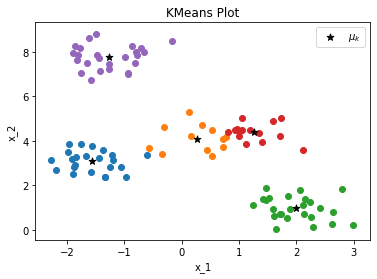

<Initialization 2>
Iteration 1 mean/center diff: 2.7081
Iteration 2 mean/center diff: 0.5500
Iteration 3 mean/center diff: 0.0000
----SSE 44.4999 after 3 iterations


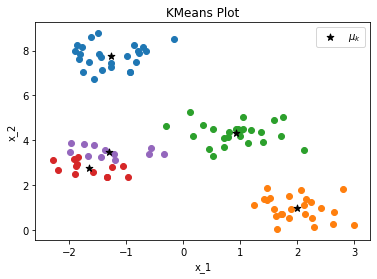

<Initialization 3>
Iteration 1 mean/center diff: 0.7443
Iteration 2 mean/center diff: 0.1781
Iteration 3 mean/center diff: 0.2323
Iteration 4 mean/center diff: 0.2953
Iteration 5 mean/center diff: 0.1465
Iteration 6 mean/center diff: 0.0000
----SSE 130.7522 after 6 iterations


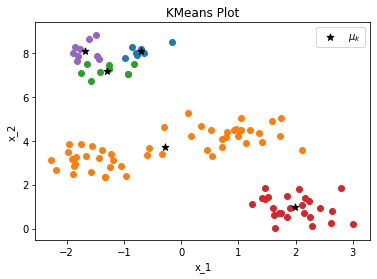

<Initialization 4>
Iteration 1 mean/center diff: 2.2537
Iteration 2 mean/center diff: 2.0726
Iteration 3 mean/center diff: 0.2948
Iteration 4 mean/center diff: 0.0000
----SSE 43.6488 after 4 iterations


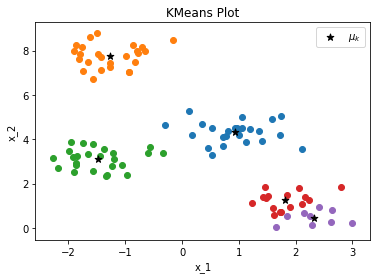

<Initialization 5>
Iteration 1 mean/center diff: 0.2780
Iteration 2 mean/center diff: 0.1971
Iteration 3 mean/center diff: 0.1366
Iteration 4 mean/center diff: 0.0999
Iteration 5 mean/center diff: 0.1350
Iteration 6 mean/center diff: 0.0000
----SSE 130.9105 after 6 iterations


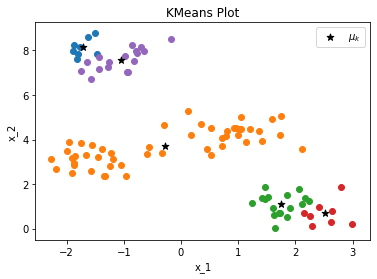



Optimal SSE: 43.3293
Optimal Mu: [[-1.56883283  3.08178097]
 [ 0.2649304   4.10027053]
 [ 1.99186903  0.96561071]
 [ 1.27097881  4.39759755]
 [-1.26811733  7.76378266]]


(array([[-1.56883283,  3.08178097],
        [ 0.2649304 ,  4.10027053],
        [ 1.99186903,  0.96561071],
        [ 1.27097881,  4.39759755],
        [-1.26811733,  7.76378266]]),
 43.32926420273358)

In [135]:
%matplotlib inline

scratch_kmeans = ScratchKMeans(5, 5)
scratch_kmeans.fit(X, verbose=True)

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数$k$は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数$k$を検討するためのコードを作成してください。<br>
<br>
SSEを縦軸、クラスタ数$k$を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [5]:
def elbow_plot(X, max_clusters, n_init=5):

    x_values = np.arange(2, max_clusters)
    y_values = np.zeros(len(x_values))

    for i, n_clusters in enumerate(x_values):
        _, sse = ScratchKMeans(n_clusters, n_init).fit(X, return_sse=True)
        y_values[i] = sse

    plt.plot(x_values, y_values)
    plt.scatter(x_values, y_values)
    plt.title("Elbow Chart")
    plt.xlabel("n_clusters")
    plt.ylabel("SSE")
    plt.show()

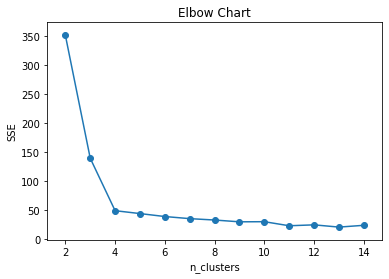

In [201]:
elbow_plot(X, 15)

## 【問題9】（アドバンス課題）シルエット図
$k$を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。<br>
<br>
Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。<br>
<br>
`silhouette_vals` : shape(n_samples,)のndarray、各データ点のシルエット係数<br>

`silhouette_avg` : float、シルエット係数の平均値<br>

`y_km` : shape(n_samples,)のndarray、各データ点のクラスタラベル名<br>

`cluster_labels` : list、クラスタのラベル名のリスト<br>

`n_clusters` : int、クラスタ数<br>
<br>
$n$番目のデータ点に対するシルエット係数$s_n$は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。<br>
 
$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

In [6]:
def calc_silhouette(X, mu, r, mean=False):
    
    silhouette_vals = np.zeros(len(X))

    for i in range(len(X)):
        cluster_self = np.delete(X, i, axis=0)
        r_self = np.delete(r, i, axis=0)
        r_label = r[i].astype(int)

        cluster_self = cluster_self[r_self == r[i]]
        a_dist = LA.norm((X[i] - cluster_self), axis=1)
        a_mean = np.mean(a_dist)

        mu_dist = LA.norm((mu[r_label] - mu), axis=1)
        r_nearest = np.argmin(np.where(mu_dist == 0, np.inf, mu_dist))
        cluster_nearest = X[r == r_nearest]
        b_dist = LA.norm((X[i] - cluster_nearest), axis=1)
        b_mean = np.mean(b_dist) 

        silhouette_vals[i] = (b_mean - a_mean) / np.max((b_mean, a_mean))
    
    silhouette_avg = np.mean(silhouette_vals)

    if mean:
        return silhouette_vals, silhouette_avg
    else:
        return silhouette_vals

In [36]:
from matplotlib import cm

def silhouette_plot(X, mu, r, ax=None):
    silhouette_vals, silhouette_avg = calc_silhouette(X, mu, r, mean=True)
    y_km = r
    cluster_labels = np.unique(r)
    n_clusters = len(cluster_labels)
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    if ax:
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(i / n_clusters)
            ax.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals)
        ax.axvline(silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(yticks)
        ax.set_yticklabels(cluster_labels + 1)
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette coefficient')
    
    else:
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(i / n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--")
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.show()

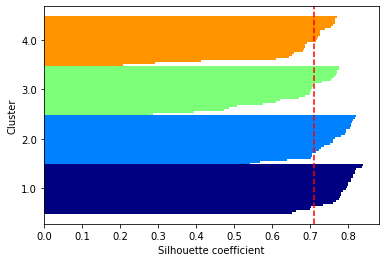

In [160]:
model = ScratchKMeans(n_clusters=4, n_init=5)

mu = model.fit(X)
r = model.predict(X)

silhouette_plot(X, mu, r)

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。<br>
<br>
[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。<br>
<br>
### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [1]:
raw_data = pd.read_csv('/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/sprint/Wholesale customers data.csv')
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data = raw_data.drop(columns=['Channel', 'Region'])
raw_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


>**《データ詳細》**
>サンプル数：440 → とある卸業者の卸先顧客
>- Fresh ~ Delicassen：各商品群の年間購入金額
>- Channel：顧客の施設種類 → Horeca(1; Hotel/Restaurant/Cafe), Retail(2)
>- Region：顧客の地域 → Lisbon(1), Oporto(2), Other(3) 

In [5]:
# 《PCAのサンプルコード》
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


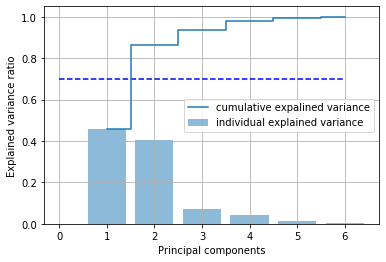

In [10]:
# 《PCAの分散説明率を表示するコードサンプル》
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

>分散説明率の7割以上をcomponent1とcomponent2が占めていることが判る。

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数$k$を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


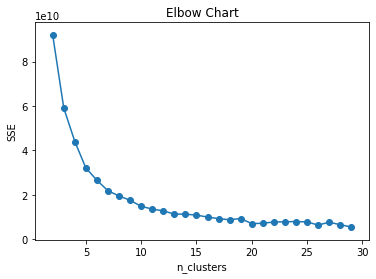

In [204]:
# エルボー図の確認
elbow_plot(data_pca, 30)

>エルボー図の転換点が5から10の間にあるため、クラスタ数はこの間から選ぶのが最適と思われる。しかし、曲線がなだらかなため、的確に判断することは難しい。<br>
>次にシルエット法を用いてみる。

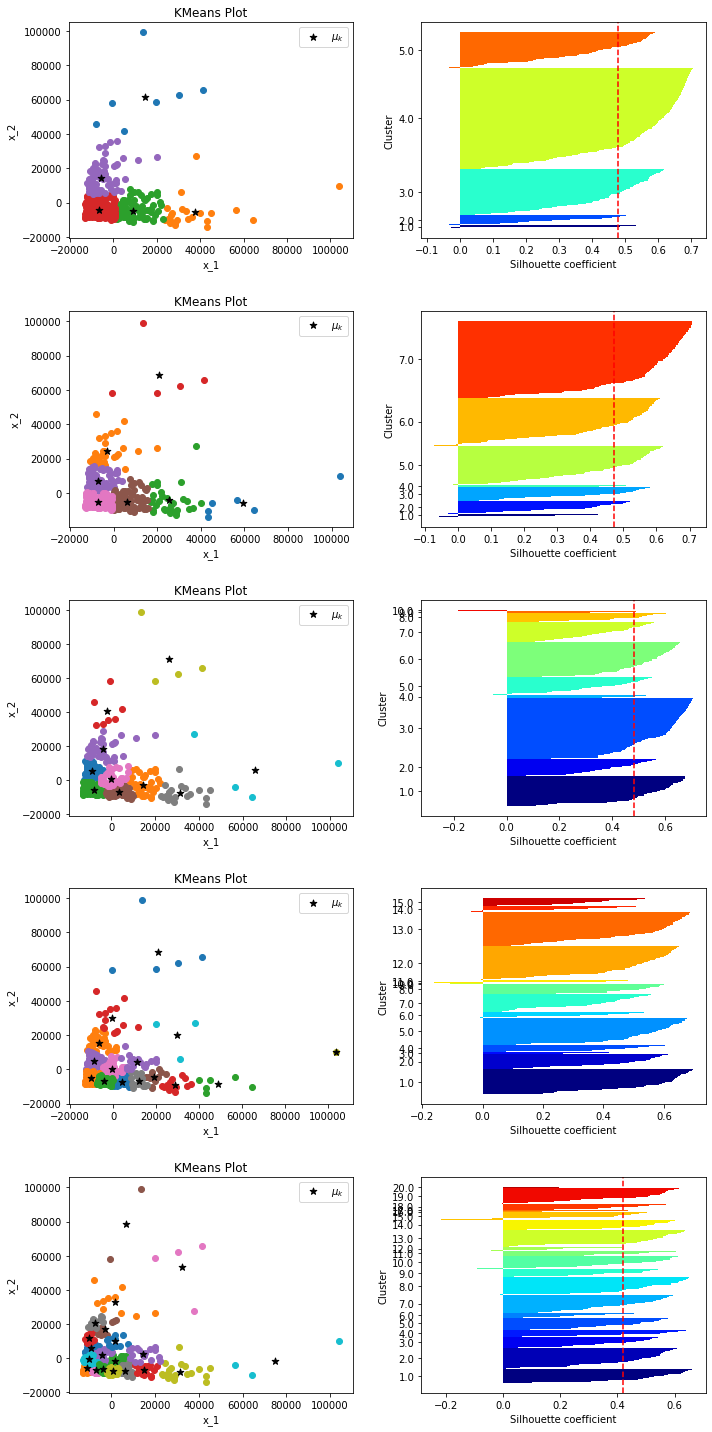

In [40]:
# エルボー地点辺りから複数のクラスタ数でシルエット図を描画
n_clusters = [5, 7, 10, 15, 20]
fig, axs = plt.subplots(5, 2, figsize = (10, 20))

for i, k in enumerate(n_clusters):

    model = ScratchKMeans(k, n_init=10)
    mu = model.fit(data_pca)
    r = model.predict(data_pca)
    
    clusters_plot(data_pca, mu, r, ax=axs[i, 0])
    silhouette_plot(data_pca, mu, r, ax=axs[i, 1])

plt.tight_layout(h_pad=2.5, w_pad=2.5)

>シルエット図からでも最適なクラスタ数を判断するのは難しく、強いて数が多いほど良く、k = 20がベストといったところだろう。しかし、分散説明率図から判る通り、二つの軸（components）が全体の分散の7割以上を占めているため、そしてデータにChannel項目があるため、データ分析より本来最適なクラスタ数は2と考察する。

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [53]:
df = pd.concat([raw_data.loc[:, ['Channel', 'Region']],
                pd.DataFrame(data_pca, columns=['x1', 'x2'])], axis='columns')

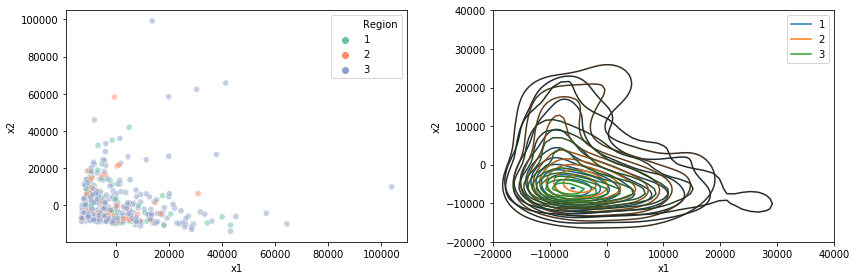

In [81]:
# Region毎のサンプル分布

import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='x1', y='x2', hue='Region', palette='Set2', alpha=0.5, ax=axs[0])
sns.kdeplot(df.loc[df.Region==1, 'x1'], df.loc[df.Region==1, 'x2'], label='1', ax=axs[1])
sns.kdeplot(df.loc[df.Region==2, 'x1'], df.loc[df.Region==2, 'x2'], label='2', ax=axs[1])
sns.kdeplot(df.loc[df.Region==3, 'x1'], df.loc[df.Region==3, 'x2'], label='3', ax=axs[1])

axs[1].set_xlim(-20000, 40000)
axs[1].set_ylim(-20000, 40000)
axs[1].legend()

plt.tight_layout(w_pad=2.5)
plt.show()

>Region毎の分布は全て重なっており、特徴量の傾向は無さそう。

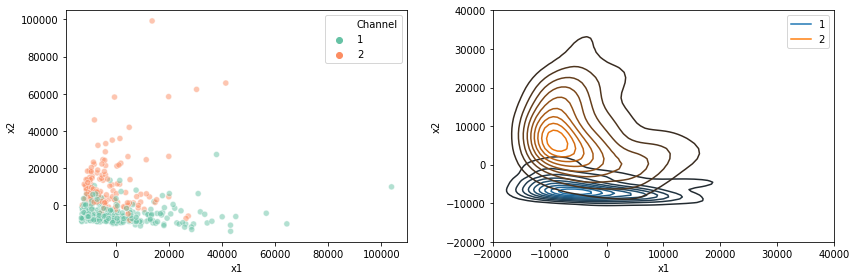

In [80]:
# Channel毎のサンプル分布

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='x1', y='x2', hue='Channel', palette='Set2', alpha=0.5, ax=axs[0])
sns.kdeplot(df.loc[df.Channel==1, 'x1'], df.loc[df.Channel==1, 'x2'], label='1', ax=axs[1])
sns.kdeplot(df.loc[df.Channel==2, 'x1'], df.loc[df.Channel==2, 'x2'], label='2', ax=axs[1])
axs[1].set_xlim(-20000, 40000)
axs[1].set_ylim(-20000, 40000)
axs[1].legend()

plt.tight_layout(w_pad=2.5)
plt.show()

>Channel毎ではサンプル分布に傾向が見られ、多少の重なりがあるものの、x_2による分類が出来そう。KMeansのクラスタリングでは中心点を基とした球状にデータを分類するため、重複するデータの分類は苦手である。そのため、このデータセットにはKMeans以外の分類法が適していると思われる。

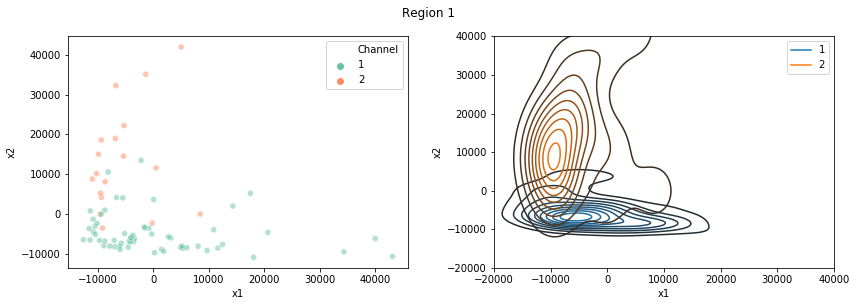

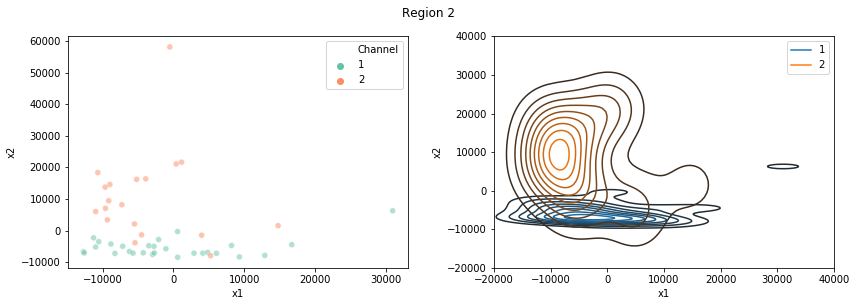

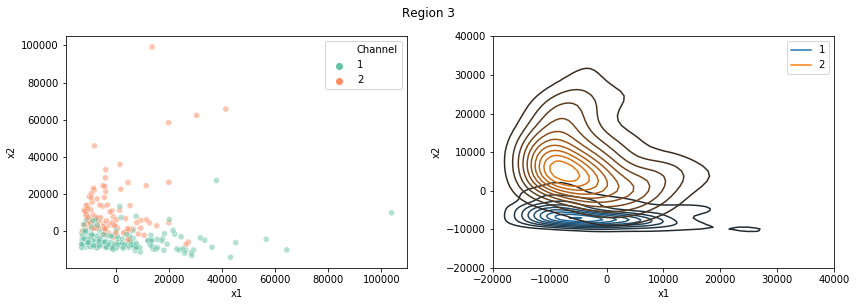

In [91]:
# 各RegionのChannel毎のサンプル分布
df_reg1 = df.loc[df.Region == 1]
df_reg2 = df.loc[df.Region == 2]
df_reg3 = df.loc[df.Region == 3]

regions = {'Region 1': df_reg1, 'Region 2': df_reg2, 'Region 3': df_reg3}

for region, data in zip(regions.keys(), regions.values()):

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(region, y=1.05)
    
    sns.scatterplot(data=data, x='x1', y='x2', hue='Channel', palette='Set2', alpha=0.5, ax=axs[0])
    sns.kdeplot(data.loc[data.Channel==1, 'x1'], data.loc[data.Channel==1, 'x2'], label='1', ax=axs[1])
    sns.kdeplot(data.loc[data.Channel==2, 'x1'], data.loc[data.Channel==2, 'x2'], label='2', ax=axs[1])
    axs[1].set_xlim(-20000, 40000)
    axs[1].set_ylim(-20000, 40000)
    axs[1].legend()
    plt.tight_layout(w_pad=2.5, h_pad=1)

plt.show()

>各Region毎のChannel分布に前述した傾向以外の発見はは確認できなかった。また、Region間のサンプル数も不均衡であり、大きくRegion 3（Other）に偏っている。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。<br>
<br>
**《ヒント》**<br>
<br>
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。<br>
<br>
条件ごとにデータを見る際にはPandasのgroupbyが便利です。<br>
<br>
[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [8]:
model = ScratchKMeans(15, n_init=10)
mu = model.fit(np.array(data_pca))
r = model.predict(np.array(data_pca))

/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [9]:
data_r = raw_data.copy()
data_r['Clusters'] = r

In [10]:
data_r.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,6.122727
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,3.894208
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,3.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,5.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,9.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,14.000000


In [109]:
data_r.groupby('Clusters').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Clusters,,,,,,,,
0.0,1.105263,2.684211,44408.105263,3175.368421,4057.473684,4617.315789,757.000000,2159.052632
1.0,1.026316,2.486842,9077.092105,1770.605263,2269.605263,3137.315789,443.881579,771.710526
2.0,1.333333,2.666667,31979.000000,32385.666667,18605.000000,34185.666667,1949.333333,23358.333333
3.0,1.000000,2.454545,27299.818182,3266.727273,4217.272727,5748.272727,544.909091,1836.318182
4.0,2.000000,2.428571,8466.714286,20037.428571,31021.500000,1898.428571,14970.142857,2386.142857
5.0,1.052632,2.508772,17674.017544,2275.263158,2737.000000,4196.491228,553.298246,1172.701754
6.0,1.611111,2.611111,25847.222222,9017.388889,10620.388889,3522.722222,2508.777778,2325.111111
7.0,1.666667,2.666667,11993.666667,11329.583333,15997.833333,3277.500000,5699.083333,3020.000000
8.0,1.600000,2.650000,11742.950000,5539.825000,7662.975000,2180.700000,2372.625000,1577.300000


>クラスタ毎にデータを分けたが、傾向は一見分からず。

In [11]:
data_r.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
Channel,,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,5.540268
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,7.345070


In [12]:
data_r.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
Region,,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,5.922078
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,5.340426
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,6.287975


>チャネルで分けたところ、FreshとFrozenの平均購入額はRetailと比較してHorecaが高いことがわかる。その他項目はRetailが高いことがわかる。また、Region毎では購入額の傾向は見られない。

## 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては**DBSCAN**、PCA以外に次元削減手法で有名な手法としては**t-SNE**や**LLE**があります。

- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

![image](https://scikit-learn.org/0.15/_images/plot_cluster_comparison_0011.png)

>**《DBSCAN》**<br>
>--メリット--
>- 事前にクラスタ数を決めなくて良い<br>
>- 分布濃度によってクラスタリングを実行
>
>--デメリット--
>- 他の手法同様、「次元の呪い」の影響を受ける<br>
><br>
>
>**《t-SNE》**<br>
>--メリット--
>- 非線形の類似度を保持したまま次元削減が可能<br>
>- 複数の多様体を分類可能
>
>--デメリット--
>- 3次元以上への削減は苦手（しかし3次元以上の特徴量を可視化することは少ないため、一概に短所とは言えない）
>- 勾配法のため、収束性が保証されない（適切なパラメータチューニングが必須）<br>
><br>
>
>**《LLE》**<br>
>--メリット--
>- 多様体の圧縮に長ける<br>
>
>--デメリット--
>- 多様体が複数ある場合、互いの位置関係を正確に表せない<br>
><br>
>
>参考記事：
>- [クラスタリング分析](http://www.kamishima.net/jp/clustering/)
>- [How DBSCAN works and why should we use it?](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)
>- [次元削減による可視化手法t-SNEとは？](https://aizine.ai/glossary-tsne/)
>- [LLE (Locally Linear Embedding) による非線形データの次元削減](https://helve-python.hatenablog.jp/entry/locally-linear-embedding)
>- [SKlearn Manifold Learning](https://scikit-learn.org/stable/modules/manifold.html)

## 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、**t-SNE**を用いて次元削減をしてください。さらにK-meansではなく、**DBSCAN**を用いてクラスタリングしてください。<br>
<br>
そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。<br>
<br>
[sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)<br>
[sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)<br>
<br>

**《パラメーターチューニング》**<br>
これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

>t-SNEを用いてデータをチャネル毎に可視化できるか試す。調査したところ、t-SNEのチューニングにはperplexityが重要と判明。<br>
>参考記事：
>- [How to use t-SNE effectively](https://distill.pub/2016/misread-tsne/)

In [155]:
# データに対してTSNE処理を実装
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

qt = QuantileTransformer(output_distribution='normal')
ss = StandardScaler()

data_qt = qt.fit_transform(data)

data_tsne = TSNE(n_components=2, n_iter=5000, perplexity=50, learning_rate=0.01).fit_transform(data_qt)
data_tsne.shape

/Users/tamiyagt/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (440). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


(440, 2)

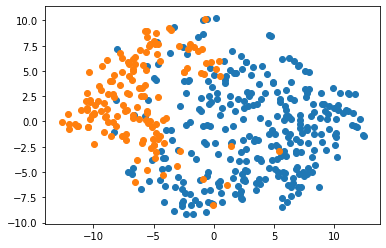

In [156]:
data_tsne_1 = data_tsne[raw_data.Channel.loc[raw_data.Channel == 1].index]
data_tsne_2 = data_tsne[raw_data.Channel.loc[raw_data.Channel == 2].index]

plt.scatter(data_tsne_1[:,0], data_tsne_1[:,1])
plt.scatter(data_tsne_2[:,0], data_tsne_2[:,1])

plt.show()

>上手く分けられず。

### t-SNEで次元削減したデータをDBSCANでクラスタリング処理を実装↓

In [157]:
dbscan_cluster = DBSCAN(eps=1).fit(data_qt)
np.unique(dbscan_cluster.labels_)

array([-1,  0])

>一応２クラス＝チャネル数にクラスタリングできた。

In [480]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_std = scaler.fit_transform(data)
data_tsne = TSNE(n_components=2, n_iter=5000, perplexity=50, learning_rate=0.5).fit_transform(data_std)
data_tsne.shape

(440, 2)

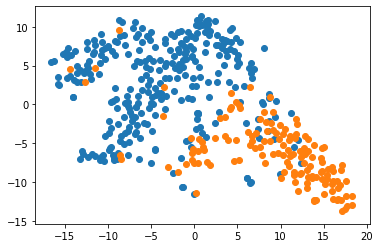

In [481]:
data_tsne_1 = data_tsne[raw_data.Channel.loc[raw_data.Channel == 1].index]
data_tsne_2 = data_tsne[raw_data.Channel.loc[raw_data.Channel == 2].index]

plt.scatter(data_tsne_1[:,0], data_tsne_1[:,1])
plt.scatter(data_tsne_2[:,0], data_tsne_2[:,1])

plt.show()

In [414]:
TSNE().get_params

<bound method BaseEstimator.get_params of TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)>

In [415]:
DBSCAN().get_params

<bound method BaseEstimator.get_params of DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)>

### 3次元t-SNE可視化も挑戦↓

In [483]:
from mpl_toolkits.mplot3d import axes3d
import time

def create_3d_tsne_plots(target_X, y, y_labels, perplexity_list= [2, 5, 30, 50, 100]):
    """
    args:
        target_X: pandas.DataFrame. 
        y: list or series owning label infomation
        y_labels: labels in y. This is set as argument becaunse only some labels are intended to be ploted.
        perplexity_list: list of integers. 
    Returns:
        None
    """    
    fig = plt.figure(figsize=(5*len(perplexity_list),4))
    for i, perplexity in enumerate(perplexity_list):
        ax = fig.add_subplot(1, len(perplexity_list), i+1, projection='3d')
        start_time = time.time()
        tsne = TSNE(n_components=3, init='random', random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="{}".format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title("Perplexity: {}".format(perplexity))
        print("Time to plot perplexity {} is {:.2f} seconds.".format(perplexity, end_time - start_time))
    plt.show()
    return None

Time to plot perplexity 2 is 6.75 seconds.
Time to plot perplexity 5 is 6.11 seconds.
Time to plot perplexity 30 is 6.33 seconds.
Time to plot perplexity 50 is 7.47 seconds.
Time to plot perplexity 100 is 10.03 seconds.


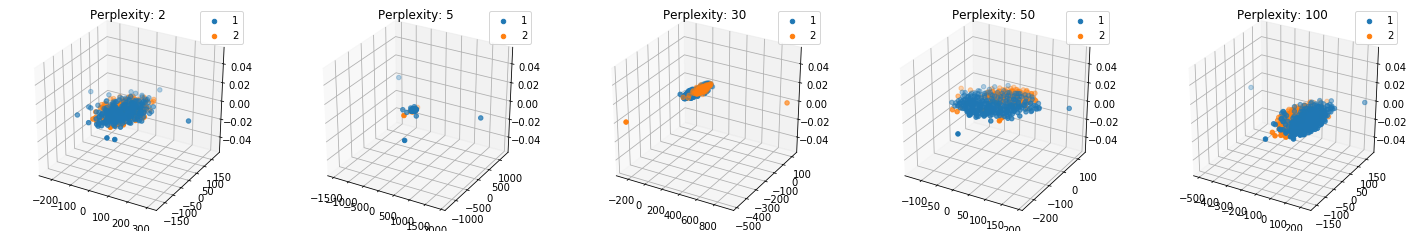

In [488]:
y = np.array(raw_data.Channel)
y_labels = np.unique(y)

create_3d_tsne_plots(data, y, y_labels)

Time to plot perplexity 2 is 6.31 seconds.
Time to plot perplexity 5 is 6.69 seconds.
Time to plot perplexity 30 is 7.51 seconds.
Time to plot perplexity 50 is 8.68 seconds.
Time to plot perplexity 100 is 10.94 seconds.


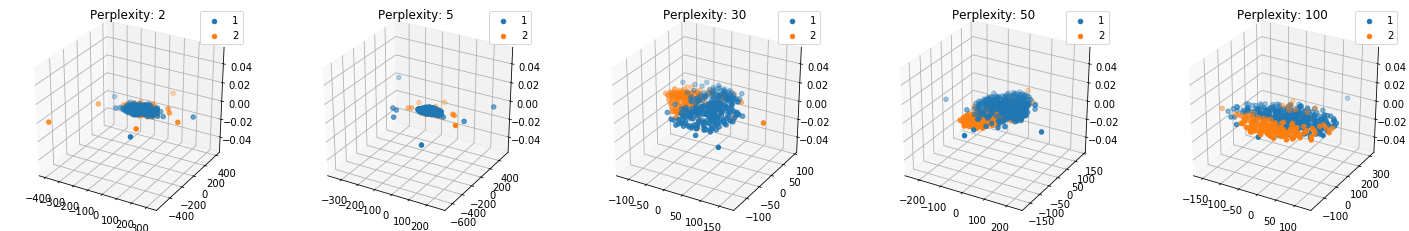

In [489]:
create_3d_tsne_plots(data_std, y, y_labels)

In [535]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=15).fit(data_std)
np.unique(dbscan_cluster.labels_)

array([-1,  0])